In [37]:
import sys, os
import warnings
import numpy as np

from obspy import read
from MyPPSD import PPSD
from obspy import read_inventory, UTCDateTime
from obspy.imaging.cm import pqlx

import matplotlib.pyplot as plt
from matplotlib.pylab import *
from matplotlib import rc, font_manager
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes





In [38]:
###########################################
# enter the path to the data files here:
#data_path = './202108/'
data_path = './PFO/'



In [39]:
###########################################
# please choose the component:

##### VERTICAL ############
#cha = 'Z'

##### NORTH ###############
cha = 'N'

##### EAST ################
#cha = 'E'


In [40]:
###########################################
# here you can set a threshold to exclude 
# data containing large signals:
thresh = 1e-9



In [41]:
###########################################
# here you can set the time interval for 
# ppsd calculations (in hours)
dh = 6



In [42]:
###########################################
# the rest can remain unchanged

y = '2021'
doys = np.arange(213, 219, 1)
hours = np.arange(0, 24, dh)
t0 = []
for d in doys:
    for h in hours:
        t1 = str(h).zfill(2)+'00:00'
        t2 = str(h+dh-1).zfill(2)+'59:59.999'
        t0.append([UTCDateTime(y+'-'+str(d).zfill(3)+'T'+t1), UTCDateTime(y+'-'+str(d).zfill(3)+'T'+t2)])

        

############################################
# read the first day
start_idx = 0
n = np.zeros(1)
for t in t0[start_idx:]:
    DD = str(t[0].day).zfill(2)
    _max_amp = []
    try:
        stR = read(data_path+'rot_'+cha+'_202108'+DD+'.mseed', starttime=t[0], endtime=t[1])
        inv = {'sensitivity': 1.0}
        stR.detrend('demean')
        st = stR.copy()
        tr = st[0]
        ppsd = []
        ppsd.append((PPSD(tr.stats, metadata=inv, special_handling='ringlaser', period_limits=(0.5, 1000))))

        month = int(t[0].month)
        for _tr in st:
            _max_amp.append((max(np.abs(_tr.data))))
        max_amp = max(_max_amp)
        print(month, t[0], t[1], max_amp)
        if max_amp <= thresh:
            print('adding stream ...')
            ppsd[0].add(st)
            n[0] = n[0] + 1
        else:
            print('signal too high')
        break
    except:
        print(t[0], 'NO data ...')
        start_idx += 1



8 2021-08-01T00:00:00.000000Z 2021-08-01T05:59:59.999000Z 1.21408013809e-10
adding stream ...


In [43]:
for t in t0[start_idx+1:]:
    _max_amp = []
    try:
        stR = read(data_path+'rot_'+cha+'_202108'+DD+'.mseed', starttime=t[0], endtime=t[1])
        st.detrend('demean')
        month = int(t[0].month)
        for _tr in st:
            _max_amp.append((max(np.abs(_tr.data))))
        max_amp = max(_max_amp)
        print(month, t[0], t[1], max_amp)
        if max_amp <= thresh:
            print('adding stream ...')
            ppsd[0].add(st)
            n[0] = n[0] + 1
        else:
            print('signal too high')
    except:
        print(t[0], 'no data ...')


print(str(n)+' streams added')


for i in range(1):
    foutname = 'TW_array_'+cha+'_'+y+'_'+str(i+1).zfill(2)+'ppsd.npz'
    print(str(i+1).zfill(2), int(n[i]), foutname)
    ppsd[i].save_npz(foutname)



8 2021-08-01T06:00:00.000000Z 2021-08-01T11:59:59.999000Z 1.21408013809e-10
adding stream ...


C:\myData\Heiner\Python\JNotebooks\LowNoise\IPG\Observations\PFO\MyPPSD.py:726: UserWarning: Already covered time spans detected (e.g. 2021-08-01T00:01:59.996900Z), skipping these slices.
  warnings.warn(msg)
C:\myData\Heiner\Python\JNotebooks\LowNoise\IPG\Observations\PFO\MyPPSD.py:726: UserWarning: Already covered time spans detected (e.g. 2021-08-01T00:31:59.996900Z), skipping these slices.
  warnings.warn(msg)
C:\myData\Heiner\Python\JNotebooks\LowNoise\IPG\Observations\PFO\MyPPSD.py:726: UserWarning: Already covered time spans detected (e.g. 2021-08-01T01:01:59.996900Z), skipping these slices.
  warnings.warn(msg)
C:\myData\Heiner\Python\JNotebooks\LowNoise\IPG\Observations\PFO\MyPPSD.py:726: UserWarning: Already covered time spans detected (e.g. 2021-08-01T01:31:59.996900Z), skipping these slices.
  warnings.warn(msg)
C:\myData\Heiner\Python\JNotebooks\LowNoise\IPG\Observations\PFO\MyPPSD.py:726: UserWarning: Already covered time spans detected (e.g. 2021-08-01T02:01:59.996900Z),

8 2021-08-01T12:00:00.000000Z 2021-08-01T17:59:59.999000Z 1.21408013809e-10
adding stream ...
8 2021-08-01T18:00:00.000000Z 2021-08-01T23:59:59.999000Z 1.21408013809e-10
adding stream ...
8 2021-08-02T00:00:00.000000Z 2021-08-02T05:59:59.999000Z 1.21408013809e-10
adding stream ...
8 2021-08-02T06:00:00.000000Z 2021-08-02T11:59:59.999000Z 1.21408013809e-10
adding stream ...
8 2021-08-02T12:00:00.000000Z 2021-08-02T17:59:59.999000Z 1.21408013809e-10
adding stream ...
8 2021-08-02T18:00:00.000000Z 2021-08-02T23:59:59.999000Z 1.21408013809e-10
adding stream ...
8 2021-08-03T00:00:00.000000Z 2021-08-03T05:59:59.999000Z 1.21408013809e-10
adding stream ...
8 2021-08-03T06:00:00.000000Z 2021-08-03T11:59:59.999000Z 1.21408013809e-10
adding stream ...
8 2021-08-03T12:00:00.000000Z 2021-08-03T17:59:59.999000Z 1.21408013809e-10
adding stream ...
8 2021-08-03T18:00:00.000000Z 2021-08-03T23:59:59.999000Z 1.21408013809e-10
adding stream ...
8 2021-08-04T00:00:00.000000Z 2021-08-04T05:59:59.999000Z 1.

In [44]:
#####################################
# now we have all the data and can plot it ...

def plot_diagram(data, cmap, cb_label, chas):
###########################################################################
# PLOTS
    #params = {'text.usetex': True,
    #        'text.latex.preamble': [r'\usepackage{cmbright}', r'\usepackage{amsmath}']}
    plt.rcParams['figure.figsize'] = 6, 6
    #plt.rcParams.update(params)
    sizeOfFont = 15
    fontProperties = {'weight' : 'bold', 'size' : sizeOfFont}
    rc('font',**fontProperties)

    fig = plt.figure()
    ax00 = plt.subplot2grid((1, 1), (0, 0))
    axes = [ax00]


    c = (0,0,0)
    props = dict(boxstyle='round', facecolor=(1,1,1), alpha=0.8)
    for (X, Y, d, median), cha, ax in zip(data, chas, axes):
        line_median = ax.loglog(X[0], median, color=(1,1,1))
        ppsd = ax.contourf(X, Y, d.T, cmap=cmap, levels=100)
        ax.grid(b=True, which='major', color=c, linestyle='-', linewidth=0.5, alpha=0.6)
        ax.tick_params(axis='x', which='major', pad=8)
        ax.yaxis.set_ticks_position('both')
        ax.set_xlim(1.2e-3, 2e0)
        ax.set_ylim(1e-13, 3e-10)

        ax.text(1.9e-3, 1.6e-10, cha, bbox=props)

        ax.tick_params(axis='x', which='both', direction='in', top=True, color=c)
        ax.tick_params(axis='y', which='both', direction='in', top=True, color=c)

        axins1 = inset_axes(ax,
                    width="50%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='lower right',
                    bbox_to_anchor=(-0.1, 0.12, 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=0)
        cb = plt.colorbar(ppsd, cax=axins1, orientation="horizontal", ticks=np.round(np.linspace(0, np.amax(d), 4, endpoint=True),0))
        cb.set_label(cb_label, color=c, fontsize=12)
        cb.ax.xaxis.set_tick_params(color=c)
        plt.setp(plt.getp(cb.ax.axes, 'xticklabels'), color=c, fontsize=12)
        cb.outline.set_edgecolor(c)


    ax00.set_xlabel('frequency [Hz]')
    ax00.set_ylabel('rotation rate spectral density [rad/s/sqrt(Hz)]')
    plt.subplots_adjust(bottom=0.1,
                        right=0.980,
                        top=0.985,
                        left=0.15,
                        wspace=0.0,
                        hspace=0.0)

    #plt.savefig('plots/TW_array_rot_ppsd_'+cha+'.png', dpi=300)
    plt.show()

def dB2rmsPSD(y):
    return 10**(y/20.0)

def get_ppsd(fname):
    ppsd = PPSD.load_npz(fname)

    data = (ppsd.current_histogram * 100 / (ppsd.current_histogram_count or 1))
    xedges = 1.0 / ppsd.period_xedges
    X, Y = np.meshgrid(xedges[:-1], dB2rmsPSD(ppsd.db_bin_edges)[:-1])

##########################################################
# this gets you the data for the white line:
    (p, _median) = ppsd.get_percentile(percentile=50)
    median = dB2rmsPSD(_median)
    return X, Y, data, median



def main():
# PPSD for the array:
    fnameZ = 'TW_array_Z_2021_01ppsd.npz'
    fnameN = 'TW_array_N_2021_01ppsd.npz'
    fnameE = 'TW_array_E_2021_01ppsd.npz'

#########################################
# enter the component here:

##### EAST ###################
#    fnames = [fnameE]

##### NORTH ##################
    fnames = [fnameN]

##### VERTICAL ###############
#    fnames = [fnameZ]

#########################################
    data = []
    chas = []
    for fname in fnames:
        X, Y, d, median = get_ppsd(fname)
        data.append((X, Y, d, median))
        cha = fname.split('_')[2]
        chas.append(cha)
    cmap = 'magma_r'
    cb_label = r'\%'


    plot_diagram(data, cmap, cb_label, chas)



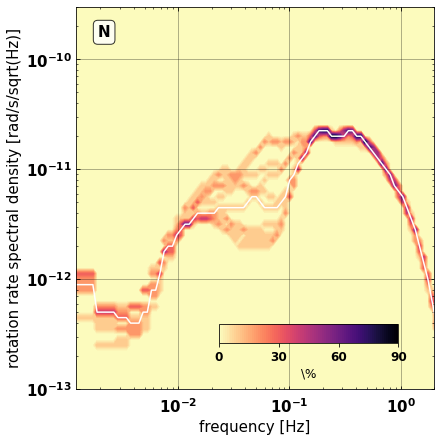

In [45]:
main()
